In [1]:
import numpy as np 
import pandas as pd

In [34]:
df = pd.read_csv('https://raw.githubusercontent.com/naashonomics/covid19_data_hacks/master/clean_corona.csv')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   age                                 3870 non-null   object
 1   sex                                 3437 non-null   object
 2   city                                3327 non-null   object
 3   province                            3368 non-null   object
 4   country                             3827 non-null   object
 5   whuan_or_not                        3870 non-null   object
 6   latitude                            3870 non-null   object
 7   longitude                           3870 non-null   object
 8   geo_resolution                      3869 non-null   object
 9   date_onset_symptoms                 1579 non-null   object
 10  date_admission_hospital             1521 non-null   object
 11  date_confirmation                   3850 non-null   obje

In [36]:
df.head()

,age,sex,city,province,country,whuan_or_not,latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhantravel_history_dates,Wuhan_connect
0,30,male,Chaohu City: Hefei City,Anhui,China,1,31.64696,117.7166,admin3,18.01.2020,20.01.2020,22.01.2020,NaN,yes,17.01.2020
1,47,male,Baohe District: Hefei City,Anhui,China,1,31.77863,117.3319,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,10.01.2020
2,49,male,High-Tech Zone: Hefei City,Anhui,China,1,31.828313,117.224844,point,15.01.2020,20.01.2020,23.01.2020,NaN,no,10.01.2020
3,47,female,High-Tech Zone: Hefei City,Anhui,China,1,31.828313,117.224844,point,17.01.2020,20.01.2020,23.01.2020,NaN,no,NaN
4,50,female,Feidong County: Hefei City,Anhui,China,1,32.00123,117.5681,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,07.01.2020


In [37]:
df['age'].unique()

array(['30', '47', '49', '50', '42', '59', '39', '38', '45', '33', '44',
       '65', '21', '41', '70', '43', '31', '40', '66', '36', '63', '37',
       '78', '76', '48', '62', '46', '34', '72', '20', '54', '2', '29',
       '61', '51', '69', '32', '28', '68', '56', '57', '35', '27', '52',
       '23', '88', '19', '53', '55', '24', '25', '22', '60', '36-45',
       '26', '64', '58', '30-39', '11', '50-59', '74', '73', '7', '82',
       '67', '15', '16', '60-69', '40-49', '80-89', '27-40', '5', '3',
       '4', '71', '20-29', '80', '77', '75', '16-80', '10', '94', '23-72',
       '81', '0.58333', '17', '8', '9', '0.08333', '12', '83', '84',
       '60-60', '1', '79', '87', '22-80', '19-77', 'Aug-68', '21-72',
       '40-89', '0.25', '13-19', '70-79', '80-80', '0-6', '0-10',
       '19-Oct', '96', '1.75', '18-65', '18', '0-18', '65-99', '90-99',
       '50-69', '92', '85', '91', '14', '19-65', '70-70', '60-70', '95',
       '16-17', 'May-59', '40-50', '13', '60-', '19-Jan', '18-50',
    

In [78]:
for i in range(0,len(df)):      
    if '-' in df['age'][i]:
        df['age'][i] = df['age'][i][-2:]   #range 40-49 is considered 49
  
  


In [86]:
#df['age'] = df.age.convert_objects(convert_numeric=True)

df['age'] = pd.to_numeric(df.age, errors='coerce')  # this will convert the Oct, August to NaN

pd.options.display.float_format = '{:,.0f}'.format
df['age']


0      30
1      47
2      49
3      47
4      50
       ..
3865   22
3866   40
3867   73
3868   60
3869   45
Name: age, Length: 3870, dtype: float64

In [87]:
df['age'].unique()

array([3.00000000e+01, 4.70000000e+01, 4.90000000e+01, 5.00000000e+01,
       4.20000000e+01, 5.90000000e+01, 3.90000000e+01, 3.80000000e+01,
       4.50000000e+01, 3.30000000e+01, 4.40000000e+01, 6.50000000e+01,
       2.10000000e+01, 4.10000000e+01, 7.00000000e+01, 4.30000000e+01,
       3.10000000e+01, 4.00000000e+01, 6.60000000e+01, 3.60000000e+01,
       6.30000000e+01, 3.70000000e+01, 7.80000000e+01, 7.60000000e+01,
       4.80000000e+01, 6.20000000e+01, 4.60000000e+01, 3.40000000e+01,
       7.20000000e+01, 2.00000000e+01, 5.40000000e+01, 2.00000000e+00,
       2.90000000e+01, 6.10000000e+01, 5.10000000e+01, 6.90000000e+01,
       3.20000000e+01, 2.80000000e+01, 6.80000000e+01, 5.60000000e+01,
       5.70000000e+01, 3.50000000e+01, 2.70000000e+01, 5.20000000e+01,
       2.30000000e+01, 8.80000000e+01, 1.90000000e+01, 5.30000000e+01,
       5.50000000e+01, 2.40000000e+01, 2.50000000e+01, 2.20000000e+01,
       6.00000000e+01, 2.60000000e+01, 6.40000000e+01, 5.80000000e+01,
      

In [88]:
new_df=df.dropna(subset=['age'])

In [89]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3857 entries, 0 to 3869
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   age                                 3857 non-null   float64
 1   sex                                 3431 non-null   object 
 2   city                                3316 non-null   object 
 3   province                            3355 non-null   object 
 4   country                             3814 non-null   object 
 5   whuan_or_not                        3857 non-null   object 
 6   latitude                            3857 non-null   object 
 7   longitude                           3857 non-null   object 
 8   geo_resolution                      3856 non-null   object 
 9   date_onset_symptoms                 1578 non-null   object 
 10  date_admission_hospital             1520 non-null   object 
 11  date_confirmation                   3837 no

In [90]:
new_df.head()

,age,sex,city,province,country,whuan_or_not,latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhantravel_history_dates,Wuhan_connect
0,30,male,Chaohu City: Hefei City,Anhui,China,1,31.64696,117.7166,admin3,18.01.2020,20.01.2020,22.01.2020,NaN,yes,17.01.2020
1,47,male,Baohe District: Hefei City,Anhui,China,1,31.77863,117.3319,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,10.01.2020
2,49,male,High-Tech Zone: Hefei City,Anhui,China,1,31.828313,117.224844,point,15.01.2020,20.01.2020,23.01.2020,NaN,no,10.01.2020
3,47,female,High-Tech Zone: Hefei City,Anhui,China,1,31.828313,117.224844,point,17.01.2020,20.01.2020,23.01.2020,NaN,no,NaN
4,50,female,Feidong County: Hefei City,Anhui,China,1,32.00123,117.5681,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,07.01.2020


In [92]:
countrywise_age = new_df.groupby('country')['age'].mean()

In [93]:
countrywise_age

country
Afghanistan            35
Algeria                38
Andorra                20
Argentina              57
Armenia                28
                       ..
Thailand               49
Tunisia                40
United Arab Emirates   52
United States          60
Vietnam                35
Name: age, Length: 66, dtype: float64

In [102]:
new_df['age group'] = pd.cut(x=new_df['age'], bins=[0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99], labels=['Toddlers','Teens','20s', '30s', '40s','50s','60s','70s','80s','90s'])

C:\Users\TAMU Libraries\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [103]:
new_df

,age,sex,city,province,country,whuan_or_not,latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhantravel_history_dates,Wuhan_connect,generation,age group
0,30,male,Chaohu City: Hefei City,Anhui,China,1,31.64696,117.7166,admin3,18.01.2020,20.01.2020,22.01.2020,NaN,yes,17.01.2020,30s,30s
1,47,male,Baohe District: Hefei City,Anhui,China,1,31.77863,117.3319,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,10.01.2020,40s,40s
2,49,male,High-Tech Zone: Hefei City,Anhui,China,1,31.828313,117.224844,point,15.01.2020,20.01.2020,23.01.2020,NaN,no,10.01.2020,40s,40s
3,47,female,High-Tech Zone: Hefei City,Anhui,China,1,31.828313,117.224844,point,17.01.2020,20.01.2020,23.01.2020,NaN,no,NaN,40s,40s
4,50,female,Feidong County: Hefei City,Anhui,China,1,32.00123,117.5681,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,07.01.2020,50,50s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3865,22,male,Brisbane,Queensland,Australia,1.0,-27.4678,153.0281,point,NaN,NaN,10.03.2020,NaN,NaN,NaN,20s,20s
3866,40,NaN,NaN,NaN,Panama,1.0,8.514317,-80.1092,admin0,NaN,NaN,09.03.2020,NaN,NaN,NaN,40s,40s
3867,73,female,Buzau,NaN,Romania,1.0,45.166667,26.816667,point,NaN,NaN,09.03.2020,fever: nausea: digestive discomfort,NaN,- 02.03.2020,70,70s
3868,60,male,Bucharest,NaN,Romania,1.0,44.4325,26.103889,point,NaN,NaN,09.03.2020,aggressive pulmonary symptomatology,NaN,NaN,60,60s


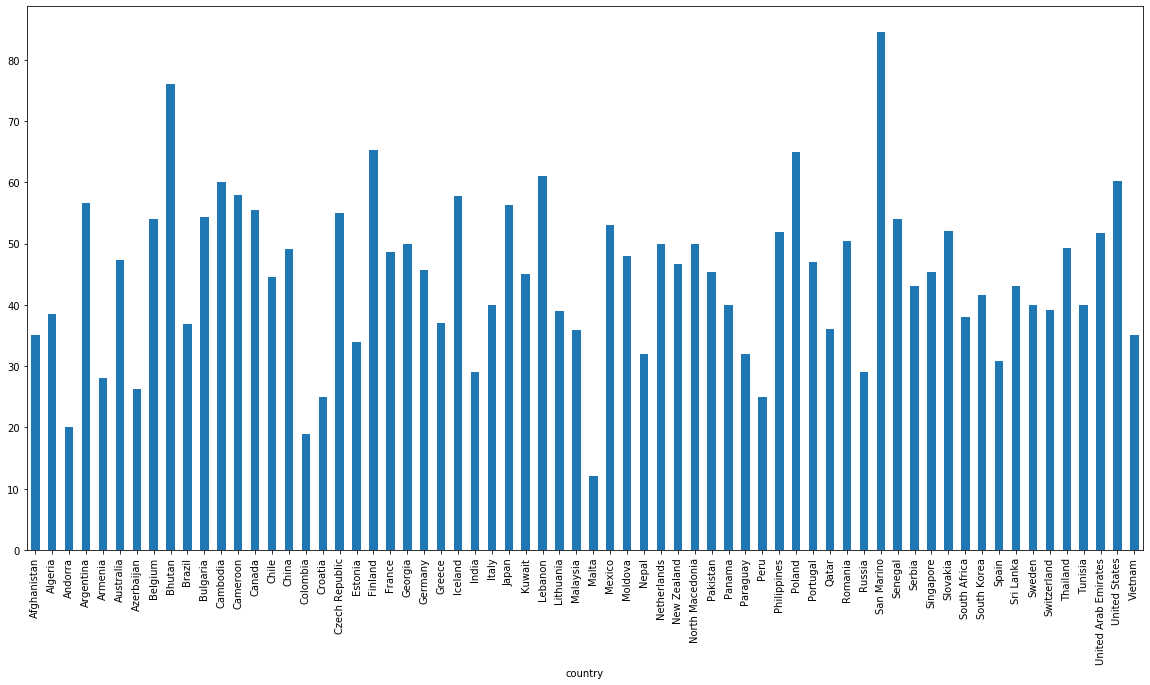

In [101]:
countrywise_age.plot(kind = 'bar',figsize=(20,10))

In [107]:
new_df['generation'] = pd.cut(x=new_df['age'], bins=[0, 19, 39, 59, 79, 99], labels=['Young Adults','Adults','Mid-Aged', 'Old', 'Very Old'])

new_df.head()

C:\Users\TAMU Libraries\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age,sex,city,province,country,whuan_or_not,latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhantravel_history_dates,Wuhan_connect,generation,age group
0,30,male,Chaohu City: Hefei City,Anhui,China,1,31.64696,117.7166,admin3,18.01.2020,20.01.2020,22.01.2020,NaN,yes,17.01.2020,Adults,30s
1,47,male,Baohe District: Hefei City,Anhui,China,1,31.77863,117.3319,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,10.01.2020,Mid-Aged,40s
2,49,male,High-Tech Zone: Hefei City,Anhui,China,1,31.828313,117.224844,point,15.01.2020,20.01.2020,23.01.2020,NaN,no,10.01.2020,Mid-Aged,40s
3,47,female,High-Tech Zone: Hefei City,Anhui,China,1,31.828313,117.224844,point,17.01.2020,20.01.2020,23.01.2020,NaN,no,NaN,Mid-Aged,40s
4,50,female,Feidong County: Hefei City,Anhui,China,1,32.00123,117.5681,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,07.01.2020,Mid-Aged,50s
